# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | BA business class in Europe h...
1,✅ Trip Verified | Our flight started in Seattl...
2,✅ Trip Verified | British Airways Flight fro...
3,✅ Trip Verified | British Airways World Trav...
4,✅ Trip Verified | BA is barely a step above ...


In [7]:
df.to_csv("BA_reviews.csv")

In [8]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,BA business class in Europe has a seat the ...
1,Our flight started in Seattle Wa heading to L...
2,British Airways Flight from Edinburgh got d...
3,British Airways World Traveller Plus (Premi...
4,BA is barely a step above low cost airlines...


In [9]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,BA business class in Europe has a seat the ...,ba business class in europe has a seat the ...
1,Our flight started in Seattle Wa heading to L...,our flight started in seattle wa heading to l...
2,British Airways Flight from Edinburgh got d...,british airways flight from edinburgh got d...
3,British Airways World Traveller Plus (Premi...,british airways world traveller plus premiu...
4,BA is barely a step above low cost airlines...,ba is barely a step above low cost airlines...


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

# Changed 'Cleaned Reviews' to 'cleaned_reviews' to match the actual column name
df['POS tagged'] = df['cleaned_reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,cleaned_reviews,POS tagged
0,BA business class in Europe has a seat the ...,ba business class in europe has a seat the ...,"[(ba, n), (business, n), (class, n), (europe, ..."
1,Our flight started in Seattle Wa heading to L...,our flight started in seattle wa heading to l...,"[(flight, n), (started, v), (seattle, a), (wa,..."
2,British Airways Flight from Edinburgh got d...,british airways flight from edinburgh got d...,"[(british, a), (airways, n), (flight, n), (edi..."
3,British Airways World Traveller Plus (Premi...,british airways world traveller plus premiu...,"[(british, a), (airways, n), (world, n), (trav..."
4,BA is barely a step above low cost airlines...,ba is barely a step above low cost airlines...,"[(ba, n), (barely, r), (step, n), (low, a), (c..."


In [15]:

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,cleaned_reviews,POS tagged,Lemma
0,BA business class in Europe has a seat the ...,ba business class in europe has a seat the ...,"[(ba, n), (business, n), (class, n), (europe, ...",ba business class europe seat economy simply...
1,Our flight started in Seattle Wa heading to L...,our flight started in seattle wa heading to l...,"[(flight, n), (started, v), (seattle, a), (wa,...",flight start seattle wa head lisbon portugal...
2,British Airways Flight from Edinburgh got d...,british airways flight from edinburgh got d...,"[(british, a), (airways, n), (flight, n), (edi...",british airway flight edinburgh get delay 1 ...
3,British Airways World Traveller Plus (Premi...,british airways world traveller plus premiu...,"[(british, a), (airways, n), (world, n), (trav...",british airway world traveller plus premium ...
4,BA is barely a step above low cost airlines...,ba is barely a step above low cost airlines...,"[(ba, n), (barely, r), (step, n), (low, a), (c...",ba barely step low cost airline try dime nic...


In [16]:
df[['reviews','Lemma']]

,reviews,Lemma
0,BA business class in Europe has a seat the ...,ba business class europe seat economy simply...
1,Our flight started in Seattle Wa heading to L...,flight start seattle wa head lisbon portugal...
2,British Airways Flight from Edinburgh got d...,british airway flight edinburgh get delay 1 ...
3,British Airways World Traveller Plus (Premi...,british airway world traveller plus premium ...
4,BA is barely a step above low cost airlines...,ba barely step low cost airline try dime nic...
...,...,...
995,Stockholm to London. Worst business class fl...,stockholm london bad business class flight f...
996,Seems like no one was aware of my existence o...,seem like one aware existence flight drink s...
997,Premium economy don’t waste your money on an ...,premium economy ’ waste money overnight flig...
998,Lisbon to London. Business class is just eco...,lisbon london business class economy class e...


In [17]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,cleaned_reviews,POS tagged,Lemma,Sentiment,Analysis
0,BA business class in Europe has a seat the ...,ba business class in europe has a seat the ...,"[(ba, n), (business, n), (class, n), (europe, ...",ba business class europe seat economy simply...,0.5719,Positive
1,Our flight started in Seattle Wa heading to L...,our flight started in seattle wa heading to l...,"[(flight, n), (started, v), (seattle, a), (wa,...",flight start seattle wa head lisbon portugal...,0.8752,Positive
2,British Airways Flight from Edinburgh got d...,british airways flight from edinburgh got d...,"[(british, a), (airways, n), (flight, n), (edi...",british airway flight edinburgh get delay 1 ...,0.5358,Positive
3,British Airways World Traveller Plus (Premi...,british airways world traveller plus premiu...,"[(british, a), (airways, n), (world, n), (trav...",british airway world traveller plus premium ...,0.9747,Positive
4,BA is barely a step above low cost airlines...,ba is barely a step above low cost airlines...,"[(ba, n), (barely, r), (step, n), (low, a), (c...",ba barely step low cost airline try dime nic...,-0.4445,Negative


In [19]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,458
Negative,438
Neutral,104


([<matplotlib.patches.Wedge at 0x7c1682eec1f0>,
 [Text(0.1447207802999444, 1.0904383961276196, 'Positive'),
  Text(-0.48703404749398377, -0.9863051437469178, 'Negative'),
  Text(1.2785827088221506, -0.43327388185882143, 'Neutral')],
 [Text(0.0789386074363333, 0.5947845797059743, '45.8%'),
  Text(-0.2656549349967184, -0.5379846238619551, '43.8%'),
  Text(0.8050335574065393, -0.2728020737629616, '10.4%')])

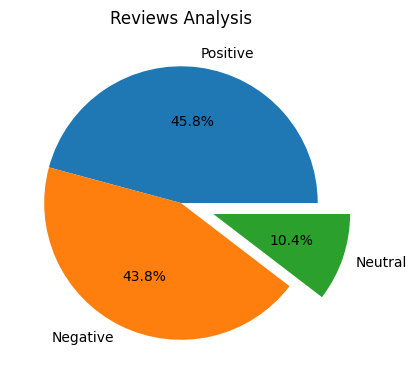

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

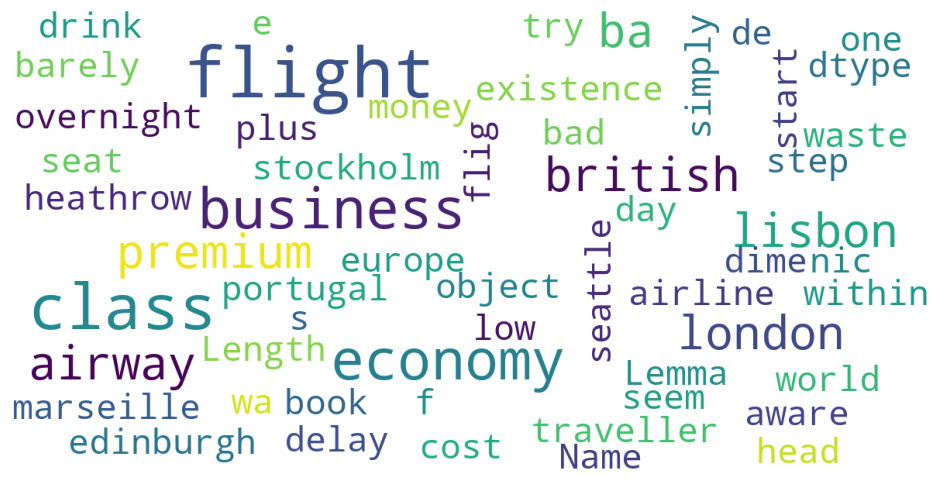

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)
